# Scatter plots with R

In [16]:
# Suppress warning messages
options(warn = -1)
options(showWarnCalls = FALSE)

# load packages
library(GGally)
library(tidyverse)

### GGAlly and GGairs Notes

GGAlly is a wrapper for ggplots2 to add plot matrix and other functionality

In GGPairs plots, each combination of variables are plotted according to whether they are:

continuous: 
- “points” (lower default), 
- “smooth”
- “smooth_loess”, 
- “density”
- “cor” (upper default)
- “blank”

combo: 
- “box”
- “box_no_facet” (upper default)
- “dot”
- “dot_no_facet”
- “facethist”
- “facetdensity”
- “denstrip”
- “blank”

discrete: 
- “ratio”
- “facetbar” (default)
- “blank”

Plots on the diagonal can either be:

continuous: 
- “densityDiag”
- “barDiag”
- “blankDiag”

discrete: 
- “barDiag”
- “blankDiag”

In [106]:
# Read data
df <- read_csv("data/insurance.csv", col_names = TRUE)
head(df)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)


age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


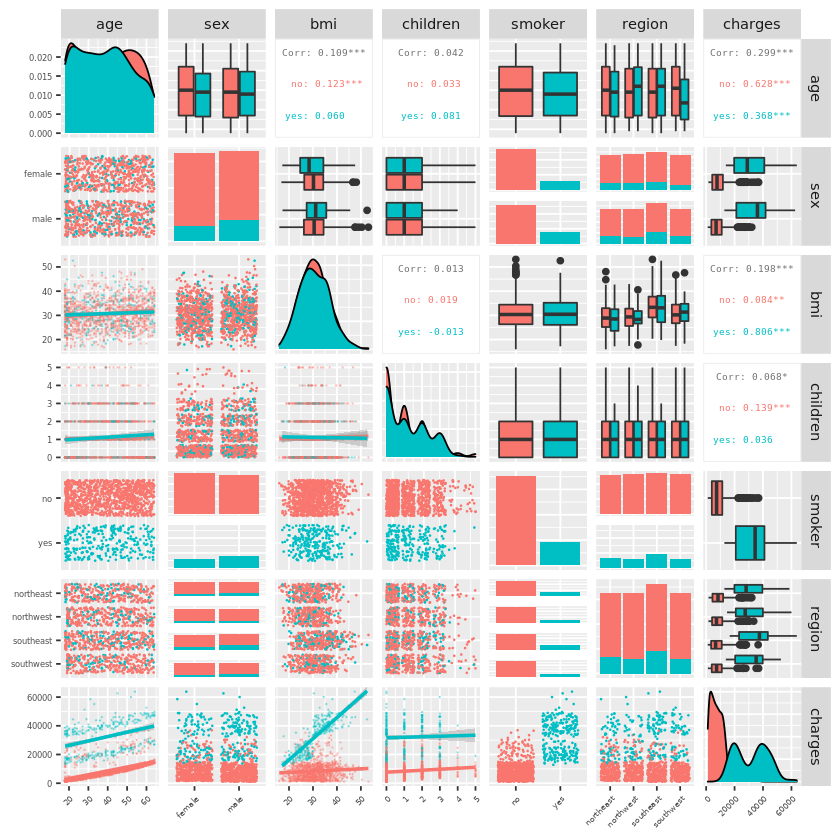

In [107]:
# See correlation matrix between columns

ggpairs(df, mapping = aes(color = smoker), size=0.1,  
    lower = list(
        combo = wrap("dot_no_facet", size=0.1),
        continuous = wrap("smooth", alpha = 0.3, size=0.1),
        discrete = wrap("facetbar")
    ),
    upper = list(
        combo = wrap("box_no_facet"),
        continuous = wrap("cor", size=2),
        discrete = wrap("facetbar")
    ),
    diag = list(
        discrete = wrap("barDiag"),
        continuous = wrap("densityDiag")
    )
) + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 5), axis.text.y = element_text(size = 5))


`geom_smooth()` using formula 'y ~ x'


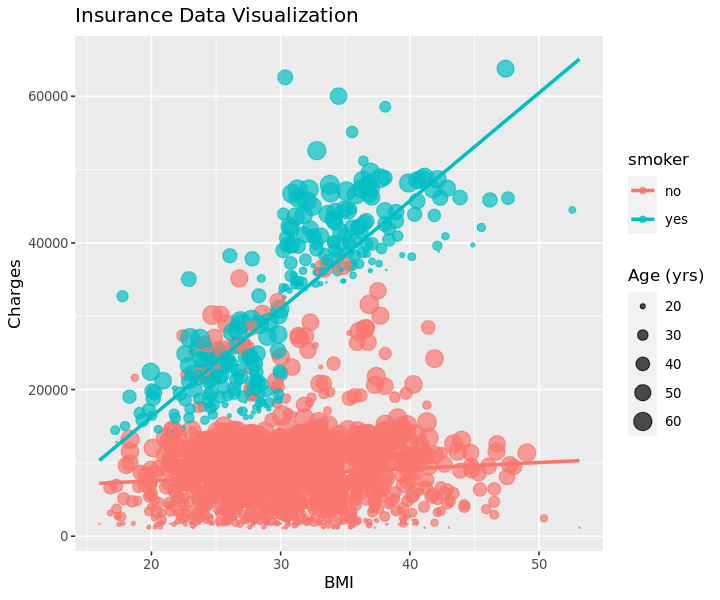

In [128]:
# Color categories scatter plot
theme_set(theme_gray(base_size=10))

options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(df, aes(x = bmi, y = charges, col = smoker)) + 
    geom_point(alpha=0.7, aes(size=age)) +
    geom_smooth(method=lm, se=FALSE, fullrange=TRUE) +
    scale_size(range = c(.1, 5), name="Age (yrs)") +
    labs(title = "Insurance Data Visualization", x = "BMI", y = "Charges") 
